In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = [x * 10 for x in range(10)]

data

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [3]:
labels = [f'{x}!' for x in range(10)]
labels

['0!', '1!', '2!', '3!', '4!', '5!', '6!', '7!', '8!', '9!']

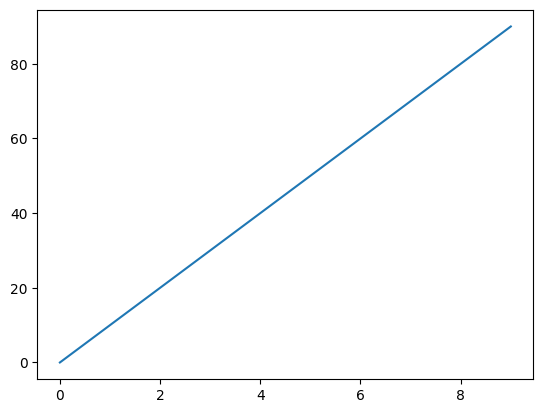

In [4]:
plt.plot(data) # x is added auto plot the y 

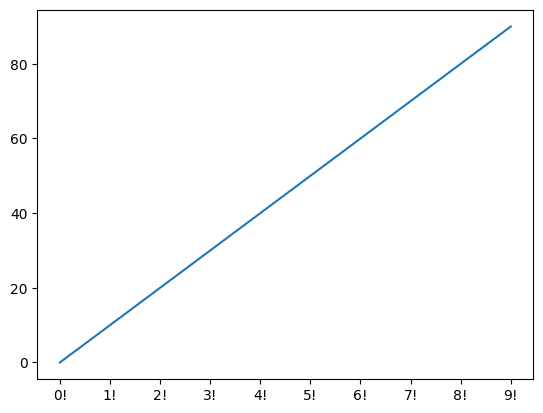

In [5]:
plt.plot(labels, data)

#plot.show() in ide

In [6]:
df = pd.DataFrame(data, labels).assign(series2 = lambda x:x[0]/2)

df.head()

,0,series2
0!,0,0.0
1!,10,5.0
2!,20,10.0
3!,30,15.0
4!,40,20.0
